In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [46]:
raw = pd.read_csv('company_data_raw.csv')
raw = raw.drop(columns=['URL', 'Timestamp', 'Unnamed: 74', 'Number of employees.1'])

## Blockchain

In [47]:
blockchain = raw[raw['Industry'] == 'Blockchain']

# Drop rows that don't have a numerical year value in 'Founded in'
def clean_founded_year(value):
    if isinstance(value, str):
        match = re.search(r'\d{4}', value)
        if match:
            return int(match.group())
    return None
blockchain['Founded in'] = blockchain['Founded in'].apply(clean_founded_year)
blockchain = blockchain.dropna(subset=['Founded in'])

# founding_bins = [0, 1999, 2009, 2019, 2029]
# labels = ['Before 2000', '2000-2009', '2010-2019', '2020-present']
# blockchain['Era Founded'] = pd.cut(blockchain['Founded in'], founding_bins, labels=labels)

/tmp/ipykernel_89/649642316.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blockchain['Founded in'] = blockchain['Founded in'].apply(clean_founded_year)


In [48]:
blockchain_success_factors = blockchain.loc[:, [
    'Company name',
    'Public/private company',
    'Founded in',
    'Success factor rankings [Founders and Leadership]',
    'Success factor rankings [Capital and Financial Mgmt]',
    'Success factor rankings [Competitive Positioning]',
    'Success factor rankings [Business Model]',
    'Success factor rankings [Ability to Pivot]',
    'Success factor rankings [Go to Market Strategy]',
    'Success factor rankings [User and Customer Benefit]',
    'Success factor rankings [Company Culture and Values]',
    'Success factor rankings [Creativity]',
    'Success factor rankings [Product / Market Fit]',
    'Success factor rankings [Technology]',
    'Success factor rankings [Value Proposition]',
    'Success factor rankings [Economy and Timing]',
    'Industry'
]]
blockchain_numeric_columns = blockchain_success_factors.iloc[:, 3:16].columns
blockchain_success_factors['Average Success Rating'] = blockchain_success_factors[blockchain_numeric_columns].mean(axis=1)
blockchain_success_factors

,Company name,Public/private company,Founded in,Success factor rankings [Founders and Leadership],Success factor rankings [Capital and Financial Mgmt],Success factor rankings [Competitive Positioning],Success factor rankings [Business Model],Success factor rankings [Ability to Pivot],Success factor rankings [Go to Market Strategy],Success factor rankings [User and Customer Benefit],Success factor rankings [Company Culture and Values],Success factor rankings [Creativity],Success factor rankings [Product / Market Fit],Success factor rankings [Technology],Success factor rankings [Value Proposition],Success factor rankings [Economy and Timing],Industry,Average Success Rating
5,Hiro Systems,Private,2013.0,4.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN,3.0,5.0,5.0,4.0,3.0,Blockchain,4.000000
6,SALT Lending,Private,2016.0,2.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,Blockchain,2.923077
7,Kiva Protocol,Non-Profit,2018.0,4.0,3.0,4.0,2.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,Blockchain,4.307692
18,Lykke,Private,2015.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,Blockchain,3.923077
19,Aleo,Private,2019.0,5.0,5.0,5.0,3.0,4.0,5.0,3.0,4.0,5.0,NaN,5.0,5.0,4.0,Blockchain,4.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Caldera,Private,2022.0,4.0,3.0,5.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,5.0,Blockchain,3.692308
194,Fnality International,Private,2019.0,5.0,5.0,3.0,3.0,1.0,4.0,5.0,4.0,3.0,4.0,4.0,4.0,3.0,Blockchain,3.692308
195,Ocean Protocol,Private,2017.0,4.0,3.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,Blockchain,4.307692
196,The Morpheus Project,Private,2019.0,4.0,3.0,3.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,3.0,Blockchain,4.076923


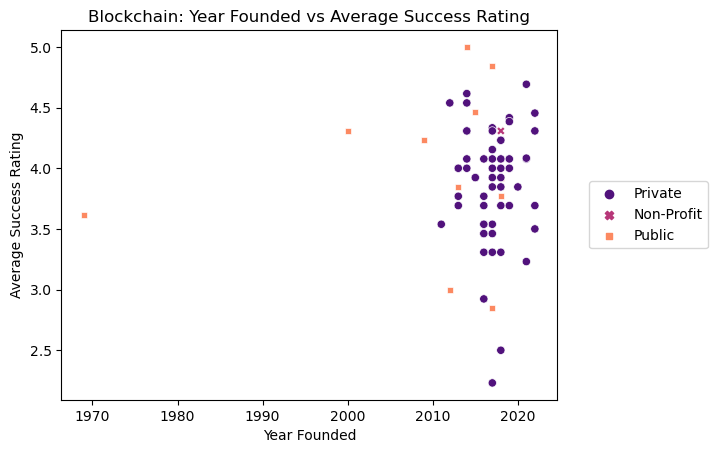

In [49]:
sns.scatterplot(data=blockchain_success_factors, x='Founded in', y='Average Success Rating',
                hue='Public/private company', style='Public/private company',
                palette='magma').legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.title('Blockchain: Year Founded vs Average Success Rating')
plt.xlabel('Year Founded')
plt.ylabel('Average Success Rating')
plt.show()

## AI/ML

In [50]:
aiml = raw[raw['Industry'] == 'AI/ML']

# Drop rows that don't have a numerical year value in 'Founded in'
aiml['Founded in'] = aiml['Founded in'].apply(clean_founded_year)
aiml = aiml.dropna(subset=['Founded in'])

# founding_bins = [0, 1999, 2009, 2019, 2029]
# labels = ['Before 2000', '2000-2009', '2010-2019', '2020-present']
# blockchain['Era Founded'] = pd.cut(blockchain['Founded in'], founding_bins, labels=labels)

/tmp/ipykernel_89/1742378487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aiml['Founded in'] = aiml['Founded in'].apply(clean_founded_year)


In [51]:
aiml_success_factors = aiml.loc[:, [
    'Company name',
    'Public/private company',
    'Founded in',
    'Success factor rankings [Founders and Leadership]',
    'Success factor rankings [Capital and Financial Mgmt]',
    'Success factor rankings [Competitive Positioning]',
    'Success factor rankings [Business Model]',
    'Success factor rankings [Ability to Pivot]',
    'Success factor rankings [Go to Market Strategy]',
    'Success factor rankings [User and Customer Benefit]',
    'Success factor rankings [Company Culture and Values]',
    'Success factor rankings [Creativity]',
    'Success factor rankings [Product / Market Fit]',
    'Success factor rankings [Technology]',
    'Success factor rankings [Value Proposition]',
    'Success factor rankings [Economy and Timing]',
    'Industry'
]]
aiml_numeric_columns = aiml_success_factors.iloc[:, 3:16].columns
aiml_success_factors['Average Success Rating'] = aiml_success_factors[aiml_numeric_columns].mean(axis=1)
aiml_success_factors

,Company name,Public/private company,Founded in,Success factor rankings [Founders and Leadership],Success factor rankings [Capital and Financial Mgmt],Success factor rankings [Competitive Positioning],Success factor rankings [Business Model],Success factor rankings [Ability to Pivot],Success factor rankings [Go to Market Strategy],Success factor rankings [User and Customer Benefit],Success factor rankings [Company Culture and Values],Success factor rankings [Creativity],Success factor rankings [Product / Market Fit],Success factor rankings [Technology],Success factor rankings [Value Proposition],Success factor rankings [Economy and Timing],Industry,Average Success Rating
0,Vectra AI,Private,2012.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,AI/ML,4.461538
1,SwingVision,Private,2019.0,5.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,3.0,AI/ML,4.307692
2,DataVisor,Private,2013.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,AI/ML,4.692308
3,Systematic Ventures,Private,2019.0,5.0,3.0,5.0,5.0,3.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,AI/ML,4.307692
4,Jerry,Private,2017.0,5.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,5.0,5.0,AI/ML,3.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Databricks,Private,2013.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,AI/ML,4.769231
205,Tempo,Private,2014.0,5.0,5.0,4.0,4.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,5.0,5.0,AI/ML,4.230769
206,DeepMind,Private,2010.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,AI/ML,4.230769
207,Botnoi Company,Private,2017.0,5.0,4.0,4.0,3.0,4.0,3.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,AI/ML,4.230769


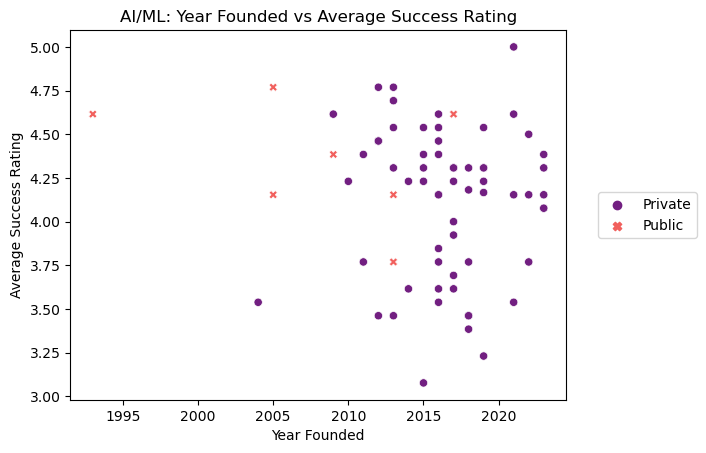

In [52]:
sns.scatterplot(data=aiml_success_factors, x='Founded in', y='Average Success Rating',
                hue='Public/private company', style='Public/private company',
                palette='magma').legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.title('AI/ML: Year Founded vs Average Success Rating')
plt.xlabel('Year Founded')
plt.ylabel('Average Success Rating')
plt.show()

## Healthcare

In [53]:
healthcare = raw[raw['Industry'] == 'Healthcare']

# Drop rows that don't have a numerical year value in 'Founded in'
healthcare['Founded in'] = healthcare['Founded in'].apply(clean_founded_year)
healthcare = healthcare.dropna(subset=['Founded in'])

# founding_bins = [0, 1999, 2009, 2019, 2029]
# labels = ['Before 2000', '2000-2009', '2010-2019', '2020-present']
# blockchain['Era Founded'] = pd.cut(blockchain['Founded in'], founding_bins, labels=labels)

/tmp/ipykernel_89/1097519149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthcare['Founded in'] = healthcare['Founded in'].apply(clean_founded_year)


In [54]:
healthcare_success_factors = healthcare.loc[:, [
    'Company name',
    'Public/private company',
    'Founded in',
    'Success factor rankings [Founders and Leadership]',
    'Success factor rankings [Capital and Financial Mgmt]',
    'Success factor rankings [Competitive Positioning]',
    'Success factor rankings [Business Model]',
    'Success factor rankings [Ability to Pivot]',
    'Success factor rankings [Go to Market Strategy]',
    'Success factor rankings [User and Customer Benefit]',
    'Success factor rankings [Company Culture and Values]',
    'Success factor rankings [Creativity]',
    'Success factor rankings [Product / Market Fit]',
    'Success factor rankings [Technology]',
    'Success factor rankings [Value Proposition]',
    'Success factor rankings [Economy and Timing]',
    'Industry'
]]
healthcare_numeric_columns = healthcare_success_factors.iloc[:, 3:16].columns
healthcare_success_factors['Average Success Rating'] = healthcare_success_factors[healthcare_numeric_columns].mean(axis=1)
healthcare_success_factors

,Company name,Public/private company,Founded in,Success factor rankings [Founders and Leadership],Success factor rankings [Capital and Financial Mgmt],Success factor rankings [Competitive Positioning],Success factor rankings [Business Model],Success factor rankings [Ability to Pivot],Success factor rankings [Go to Market Strategy],Success factor rankings [User and Customer Benefit],Success factor rankings [Company Culture and Values],Success factor rankings [Creativity],Success factor rankings [Product / Market Fit],Success factor rankings [Technology],Success factor rankings [Value Proposition],Success factor rankings [Economy and Timing],Industry,Average Success Rating
8,Butterfly Network,Public,2011.0,2.0,2.0,4.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,Healthcare,3.461538
9,Sinopharm Group,Public,1998.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,Healthcare,3.846154
10,Flatiron Health,Private,2012.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,Healthcare,4.461538
11,"Omada Health, Inc.",Private,2011.0,4.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0,4.0,Healthcare,4.230769
12,Corti,Private,2016.0,5.0,2.0,4.0,2.0,3.0,4.0,3.0,4.0,5.0,3.0,5.0,4.0,4.0,Healthcare,3.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Genentech,Public,1976.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,Healthcare,4.615385
198,"Teladoc Health, Inc.",Public,2002.0,5.0,4.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,Healthcare,4.307692
199,HealthifyMe,Private,2012.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,Healthcare,3.846154
210,Ciitizen,Private,2017.0,3.0,NaN,3.0,5.0,3.0,4.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,Healthcare,4.083333


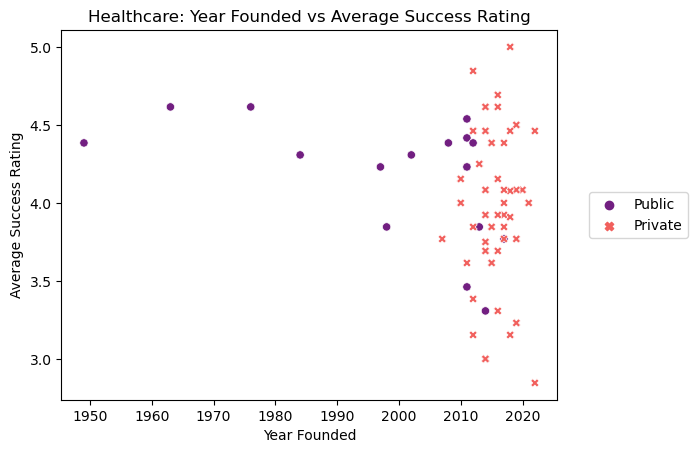

In [55]:
sns.scatterplot(data=healthcare_success_factors, x='Founded in', y='Average Success Rating',
                hue='Public/private company', style='Public/private company',
                palette='magma').legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.title('Healthcare: Year Founded vs Average Success Rating')
plt.xlabel('Year Founded')
plt.ylabel('Average Success Rating')
plt.show()

## Comparative Analysis: Blockchain, AI/ML, Healthcare

In [56]:
frames = [blockchain_success_factors, aiml_success_factors, healthcare_success_factors]
joined = pd.concat(frames)
joined

,Company name,Public/private company,Founded in,Success factor rankings [Founders and Leadership],Success factor rankings [Capital and Financial Mgmt],Success factor rankings [Competitive Positioning],Success factor rankings [Business Model],Success factor rankings [Ability to Pivot],Success factor rankings [Go to Market Strategy],Success factor rankings [User and Customer Benefit],Success factor rankings [Company Culture and Values],Success factor rankings [Creativity],Success factor rankings [Product / Market Fit],Success factor rankings [Technology],Success factor rankings [Value Proposition],Success factor rankings [Economy and Timing],Industry,Average Success Rating
5,Hiro Systems,Private,2013.0,4.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN,3.0,5.0,5.0,4.0,3.0,Blockchain,4.000000
6,SALT Lending,Private,2016.0,2.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,Blockchain,2.923077
7,Kiva Protocol,Non-Profit,2018.0,4.0,3.0,4.0,2.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,Blockchain,4.307692
18,Lykke,Private,2015.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,Blockchain,3.923077
19,Aleo,Private,2019.0,5.0,5.0,5.0,3.0,4.0,5.0,3.0,4.0,5.0,NaN,5.0,5.0,4.0,Blockchain,4.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Genentech,Public,1976.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,Healthcare,4.615385
198,"Teladoc Health, Inc.",Public,2002.0,5.0,4.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,Healthcare,4.307692
199,HealthifyMe,Private,2012.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,Healthcare,3.846154
210,Ciitizen,Private,2017.0,3.0,NaN,3.0,5.0,3.0,4.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,Healthcare,4.083333


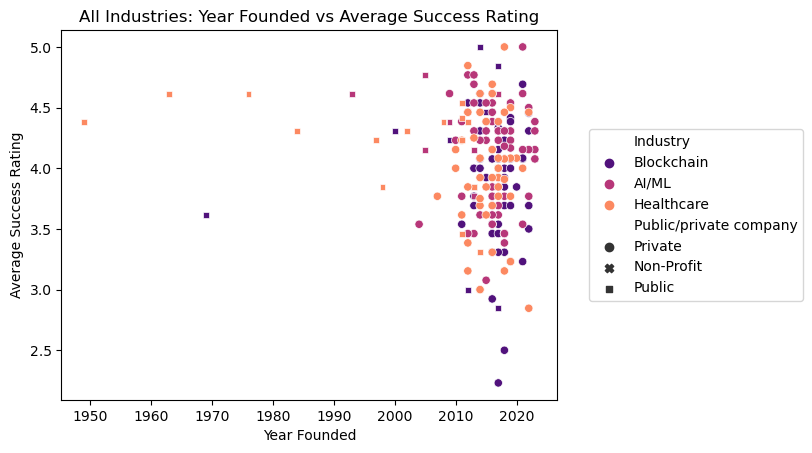

In [57]:
sns.scatterplot(data=joined, x='Founded in', y='Average Success Rating',
                hue='Industry', style='Public/private company',
                palette='magma').legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.title('All Industries: Year Founded vs Average Success Rating')
plt.xlabel('Year Founded')
plt.ylabel('Average Success Rating')
plt.show()